# Scraping Bestseller books from amazon

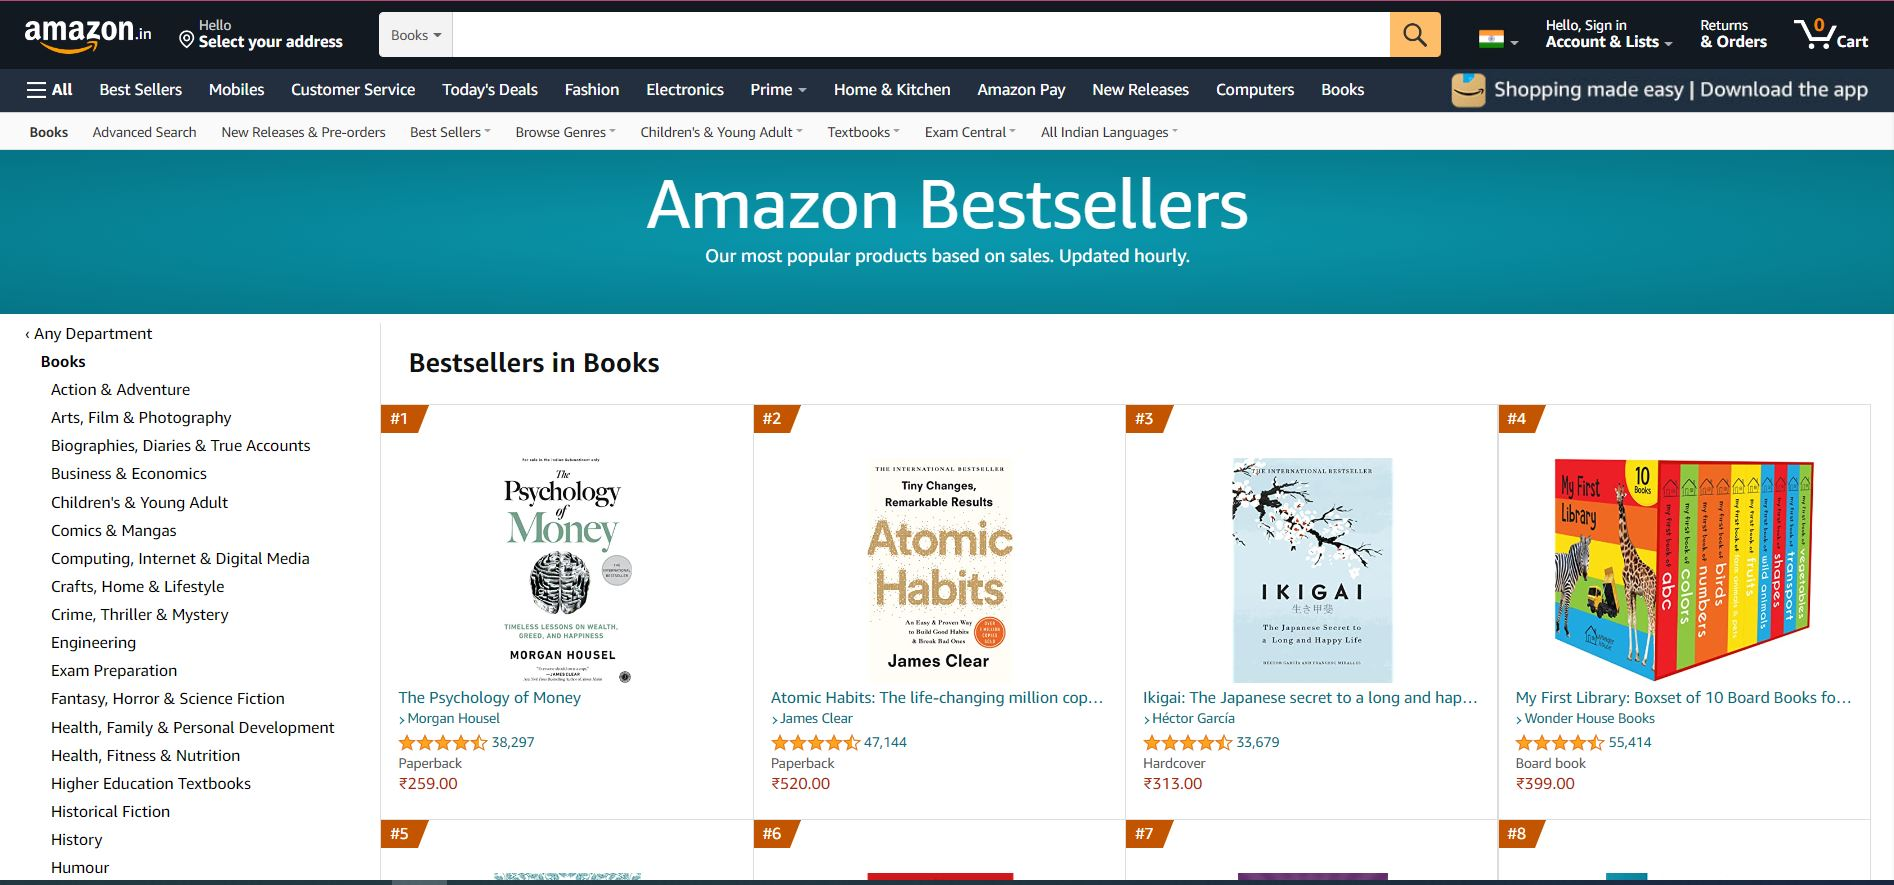



Web Scraping is the process of extracting data from web in a automated way. Here we scrape IMDb for getting movies data.


[Amazon](https://www.amazon.in/) is one of the largest online marketplaces in the United States, if not the world. Users can buy items from Amazon or a third-party seller on Amazon, or sell their own items. Orders are then delivered using common worldwide courier services. The company also sells its own line of technology items.

The page https://www.amazon.in/gp/bestsellers/books/ provides the list of best seller books on amazon and we are going to scrape these bestseller books details like position, name, writer, price, rating and total reviews. Here we'll use python `requests` and `beautifulsoup4` libraries to scrape this data.

We'll follow the below given steps:
1. Download the webpage using `requests`
2. Parse the HTML source code using `BeautifulSoup`
3. Extract position, name, writer, price, rating and total reviews from the page
4. Store the extracted information into Python lists and dictionary
5. Save the extracted information into a CSV file

At the end of this project we'll have a CSV file in following format:
![csv-file]()

## How to run the code
You can execute the code using "Run" button at the top of this page or Shift + Enter. Also you can make changes and save your own version of the notebook to [Jovian](https://jovian.ai/1242sanjay/web-scrapping-project-2) by executing the following cells.
Use the "Run" button to execute the code.

## 1. Download the webpage using `requests`

Let's install the Python `requests` library which we will use to fetch the we page and import it.

In [117]:
# Install the library
!pip install requests --upgrade --quiet

In [118]:
import requests

Now the `requests` library is installed and imported.

Now we can use `get()` method from `requests`. The `get()` method of `requests` take url of the page as a parameter and returns a web object containing the data from web page and some other information.

In [119]:
page_url = 'https://www.amazon.in/gp/bestsellers/books/'

In [120]:
response = requests.get(page_url)

In [121]:
type(response)

requests.models.Response

Here we checking the status code of the response by `response.status_code`. If [HTTP status code](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status) will have a value between 200 to 299 then the request is successful and we got successful response.

In [122]:
response.status_code

200

In [123]:
page_content = response.text
len(page_content)

318993

The page_content contains over 3,00,000 characters!<br>
Here the first 500 characters of page_content to check how it looks like. 

In [124]:
page_content[:500]

'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completio'

This above content is looks like  [HTML source code](https://www.w3schools.com/html/). Now we'll save this page_content into a HTML file.

In [125]:
with open('amazon_bestseller_books.html', 'w', encoding = 'utf-8') as f:
    f.write(page_content)

### 1.1. Converting into function
Here we combine all above steps and create a function which takes page_url as input and return the page content as output.

In [126]:
def fetching_web_page(page_url):
    """
        This function takes page_url as argument and returns content of the page
        and some other information as output.
    """
    # fetch the url and getting the response
    response = requests.get(page_url)
    # If status_code is 200 then page fetched successfully otherwise failed
    if response.status_code != 200:
        raise Exception('Somthing went wrong while fetching the web page')
    return response.text

In this section we fetched the web page using `requests` library.

## 2. Parse the HTML source code using `BeautifulSoup`
Now we have to parse the web page which we downloaded in above section. So for the web page we use Python [beautifulsoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library.Here we will install the library and import it.

In [127]:
# Install the library
!pip install beautifulsoup4 --upgrade --quiet

In [128]:
from bs4 import BeautifulSoup

The library is installed and imported. Now we can open the HTML file in read mode and read the content of the file.

In [129]:
with open('amazon_bestseller_books.html', 'r') as f:
    html_content = f.read()

We'll use the `BeautifulSoup` library and pass the downloaded page content to it and it return a BeautifulSoup object document. And the type of this document is "bs4.BeautifulSoup".

In [130]:
# doc = BeautifulSoup(html_content, 'html.parser')
doc = BeautifulSoup(page_content)

In [131]:
type(doc)

bs4.BeautifulSoup

Now this document is ready for parsing. now we can use different properties and method to extract data from this document.

For example - 
    Here we extracted title of the document by using `doc.title.text`

In [132]:
doc.title.text

'Amazon.in Bestsellers: The most popular items in Books'

### 2.1. Converting into function

We'll combine all steps of this section and convert it into a function which will takes content of the page as argument and returns a `BeautifulSoup` document.

In [133]:
def get_doc(page_content):
    """
        This function takes a HTML, XML page as a argument and 
        returns a BeautifulSoup document for this page.
    """
    doc = BeautifulSoup(page_content)
    return doc

## 3. Extract the Book details position, name, writer, price, rating, total reviews form the document

In this section first we'll extract all the bestseller books `div`. Once we got all books then we will start extracting the data from each book like bestseller_ranking, poster, book_name, writer, rating, reviews and price. 

### 3.1. Finding movies Items

We'll extract all the books `div` using `doc.find_all()` method and `id='gridItemRoot'`. This will give us list of all bestseller books on the document. here we'll check the no. of books extracted by the document using `len(book_docs)`.

In [134]:
book_docs = doc.find_all('div', id='gridItemRoot')

In [135]:
book_doc = book_docs[7]
book_doc

<div class="a-column a-span12 a-text-center _cDEzb_grid-column_2hIsc" id="gridItemRoot"><div class="a-cardui _cDEzb_grid-cell_1uMOS expandableGrid p13n-grid-content" data-a-card-type="basic" id="p13n-asin-index-7"><div class="a-section zg-bdg-ctr"><div class="a-section zg-bdg-body zg-bdg-clr-body aok-float-left"><span class="zg-bdg-text">#8</span></div><div class="a-section zg-bdg-tri zg-bdg-clr-tri aok-float-left"></div></div><div class="zg-grid-general-faceout"><div class="p13n-sc-uncoverable-faceout" id="0143333623"><a class="a-link-normal" href="/Grandmas-Bag-Stories-Sudha-Murty/dp/0143333623/ref=zg_bs_books_sccl_8/000-0000000-0000000?pd_rd_i=0143333623&amp;psc=1" role="link" tabindex="-1"><div class="a-section a-spacing-mini _cDEzb_noop_3Xbw5"><img alt="Grandma's Bag of Stories: Collection of 20+ Illustrated short stories, traditional Indian folk tales for all ages for childre" class="a-dynamic-image p13n-sc-dynamic-image p13n-product-image" data-a-dynamic-image='{"https://images-

Here We got all the `book_items` and above we saw how the each book looks like by printing first book item.

Now we'll extract the data like bestseller_ranking, poster, book_name, writer, rating, reviews and price one by one. Here we'll extract these data for first book and after this we'll define a function which extract these data for all the books.

### 3.2. Extracting position and poster of book
bestseller position of book is inside `span` tag and the `class_="zg-bdg-text"` so we can get positon of the book using `find()` method.

In [136]:
position = book_doc.find('span', class_="zg-bdg-text").text.strip('#')
position

'8'

Here we'll extract the poster of the book. The poster is in `img` tag. so we can get the movie poster by using this `img` tag and the attribute `src`.

In [137]:
poster = book_doc.find('img')['src']
poster

'https://images-eu.ssl-images-amazon.com/images/I/81jv44QdNwL._AC_UL302_SR302,200_.jpg'

### 3.3. Extracting book name and writer
Here we'll extract the book name and the writer by using `find_all()` method. The name and writer of the book present in the a `div` which contain class name as `class_="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y"`.

In [138]:
book_name_and_writer = book_doc.find_all('div', class_="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y")

In [139]:
book_name_and_writer

[<div class="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y">Grandma's Bag of Stories: Collection of 20+ Illustrated short stories, traditional Indian folk tales for all ages for children of all ages by Sudha Murty</div>,
 <div class="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y">Sudha Murty</div>]

Now we extract book name and writer by using `.text` property.

In [140]:
book_name = book_name_and_writer[0].text
book_name

"Grandma's Bag of Stories: Collection of 20+ Illustrated short stories, traditional Indian folk tales for all ages for children of all ages by Sudha Murty"

In [141]:
writer = book_name_and_writer[1].text
writer

'Sudha Murty'

#### 3.3.1. Convert into a function
Now let's convert the above logic into a function which takes a book document as input and extract the name and writer of the book from the document.

In [142]:
def book_name_writer(book_doc):
    """
        This function takes book document as input 
        and extract the name and writer of the book and return them.
    """
    book_name_and_writer = book_doc.find_all('div', class_="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y")
    if len(book_name_and_writer) < 2:
        book_name_doc = book_doc.find_all('div', class_="_cDEzb_p13n-sc-css-line-clamp-2_EWgCb")
        book_name = '' if len(book_name_doc)<1 else book_name_doc[0].text
        writer_name_doc = book_doc.find_all('div', class_="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y")
        writer = '' if len(writer_name_doc)<1 else writer_name_doc[0].text
    else:
        book_name = book_name_and_writer[0].text
        writer = book_name_and_writer[1].text
    return book_name, writer

In [143]:
book_name_writer(book_doc)

("Grandma's Bag of Stories: Collection of 20+ Illustrated short stories, traditional Indian folk tales for all ages for children of all ages by Sudha Murty",
 'Sudha Murty')

### 3.4. Extracting the reviews and rating of the book
Now we'll extract reviews and rating of the book from `div` which contain class name as `class_="a-icon-row"` by using `find()` method.

In [144]:
review_and_rating_doc = book_doc.find('div', class_="a-icon-row")

Here we are using `.find()` method to extract rating of the book from `i` tag by using `.text` property.

In [145]:
rating = review_and_rating_doc.find('i').text.split(' ')[0]

In [146]:
rating

'4.6'

Here we are using `.find()` method to extract the reviews from `span` tag having class `class_="a-size-small"` by `.text` property.

In [147]:
reviews = review_and_rating_doc.find('span', class_="a-size-small").text

In [148]:
reviews

'15,252'

Here reviews are not a proper format so we are removing the `,` by using `.split()` function and convert it into a formatted value.

In [149]:
total_reviews = ''
for i in reviews.split(','):
    total_reviews += i

In [150]:
total_reviews

'15252'

#### 3.4.1. Converting into a function
Here we are converting the above code into a function which is taking a book doc as input and extract the rating and reviews of the book.

In [151]:
def review_rating(book_doc):
    '''
        This function takes book document as input and extract rating and reviews of the books.
    '''
    review_and_rating_doc = book_doc.find('div', class_="a-icon-row")
    if review_and_rating_doc == None:
        rating = ''
        total_reviews = ''
    else:
        rating = review_and_rating_doc.find('i').text.split(' ')[0]
        reviews = review_and_rating_doc.find('span', class_="a-size-small").text
        total_reviews = ''
        for i in reviews.split(','):
            total_reviews += i
    return rating, total_reviews

In [152]:
review_rating(book_doc)

('4.6', '15252')

### 3.5. Extracting the price of the book
Here we are using `find()` method to extract the price of the book which is in `span` tag and having class `class_="p13n-sc-price"` and using `.text` property to get price and `.strip('₹')` to trim the value of the price.

In [153]:
price_doc = book_doc.find('span', class_="p13n-sc-price")
price = '' if price_doc == None else price_doc.text.strip('₹')
price

'162.00'

### 3.6. Extract the data from the book items
Now lets combine all the above subsections and create a function using these subsections for extract the data from book. This function takes a book document as input and return the required data which we need.

In [154]:
def book_data(book_doc):
    '''
    This function takes a book item document as input and
    extract all the information from the book and return it as a dictionary.
    '''
    position = book_doc.find('span', class_="zg-bdg-text").text.strip('#')
    poster = book_doc.find('img')['src']
    name, writer = book_name_writer(book_doc)
    rating, review = review_rating(book_doc)
    price_doc = book_doc.find('span', class_="p13n-sc-price")
    price = '' if price_doc == None else price_doc.text.strip('₹')
    return {
        'book_rank' : position,
        'book_poster' : poster,
        'book_name' : name,
        'book_writer' : writer,
        'book_rating' : rating,
        'book_review' : review,
        'book_price' : price
    }

In [155]:
book_data(book_doc)

{'book_rank': '8',
 'book_poster': 'https://images-eu.ssl-images-amazon.com/images/I/81jv44QdNwL._AC_UL302_SR302,200_.jpg',
 'book_name': "Grandma's Bag of Stories: Collection of 20+ Illustrated short stories, traditional Indian folk tales for all ages for children of all ages by Sudha Murty",
 'book_writer': 'Sudha Murty',
 'book_rating': '4.6',
 'book_review': '15252',
 'book_price': '162.00'}

## 4. Store the extracted information into Python dictionary of lists
Now we can extract the data for all the movie by applying a loop over books and store these data into a dictionary of lists.

In [156]:
def find_all_books_data(book_docs):
    '''
    This function takes list of the book document as input and 
    extract all the information from all books and store it into a dictionary of lists and return it.
    '''
    book_dict = {
        'book_rank' : [],
        'book_poster' : [],
        'book_name' : [],
        'book_writer' : [],
        'book_rating' : [],
        'book_review' : [],
        'book_price' : []
    }
    
    for book in book_docs:
        books_data = book_data(book)
        book_dict['book_rank'].append(books_data['book_rank'])
        book_dict['book_poster'].append(books_data['book_poster'])
        book_dict['book_name'].append(books_data['book_name'])
        book_dict['book_writer'].append(books_data['book_writer'])
        book_dict['book_rating'].append(books_data['book_rating'])
        book_dict['book_review'].append(books_data['book_review'])
        book_dict['book_price'].append(books_data['book_price'])
        
    return book_dict

In [157]:
find_all_books_data(book_docs)

{'book_rank': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50'],
 'book_poster': ['https://images-eu.ssl-images-amazon.com/images/I/711c-uf6AFL._AC_UL302_SR302,200_.jpg',
  'https://images-eu.ssl-images-amazon.com/images/I/91bYsX41DVL._AC_UL302_SR302,200_.jpg',
  'https://images-eu.ssl-images-amazon.com/images/I/81y5CSFOXuL._AC_UL302_SR302,200_.jpg',
  'https://images-eu.ssl-images-amazon.com/images/I/71g2ednj0JL._AC_UL302_SR302,200_.jpg',
  'https://images-eu.ssl-images-amazon.com/images/I/81l3rZK4lnL._AC_UL302_SR302,200_.jpg',
  'https://images-eu.ssl-images-amazon.com/images/I/81bsw6fnUiL._AC_UL302_SR302,200_.jpg',
  'https://images-eu.ssl-images-am

### 5. Now combine all and define a funtion to scrape data for n pages and save the extracted information into a CSV file
Now we have the books data in a dictionary of lists. So let us write and save this data into a csv file. For this we have to import pandas library and converting this to a dataframe using function `pd.DataFrame()` and save in a csv file by using `DataFrame.to_csv()`.

Here we write a function which scrape amazon bestseller books to given number of pages.

In [158]:
def scrape_amazon_book(pages, path):
    '''
        In this function we pass how many pages we want to extract as 'pages'
        and second path of the csv file in which we want to store the books data.
        This function simply extract all the d
        
    '''
    import pandas as pd
    book_documents = []
    for page in range(1, pages+1):
        page_url = 'https://www.amazon.in/gp/bestsellers/books/'
        if page > 1:
            page_url =  f'https://www.amazon.in/gp/bestsellers/books/ref=zg_bs_pg_{page}?ie=UTF8&pg={page}'
   
        page_content = fetching_web_page(page_url)
        doc = get_doc(page_content)
        book_docs = doc.find_all('div', id='gridItemRoot')
        book_documents += book_docs
    books_data = find_all_books_data(book_documents)
    bestseller_df = pd.DataFrame(books_data)
    bestseller_df.to_csv(path)

In [159]:
scrape_amazon_book(5, 'amazon_bestseller_books.csv')

## Summary
In this project we scrapped Amazon website to extract bestseller books data for given n number of pages and save this data to a given csv file. For scrapping this website we used Python programming language. We used `requests` and `BeautifulSoup` library of python.

## References
1. What is web scrapping : https://www.zyte.com/learn/what-is-web-scraping/
2. Amazon website : https://www.amazon.in/
3. Amazon bestseller book page link : https://www.amazon.in/gp/bestsellers/books/
4. Python `requests` library documentation : https://requests.readthedocs.io/en/latest/
5. `requests` W3school : https://www.w3schools.com/python/module_requests.asp
6. BeautifulSoup library documentation : https://www.crummy.com/software/BeautifulSoup/bs4/doc/
7. Know more about CSV file - Wikipedia : https://en.wikipedia.org/wiki/Comma-separated_values
8. HTTP status code : https://developer.mozilla.org/en-US/docs/Web/HTTP/Status
9. You can find this jupyter notebook here :https://jovian.ai/1242sanjay/web-scrapping-project-2

In [160]:
!pip install jovian --upgrade --quiet

In [161]:
import jovian

In [162]:
# Execute this to save new versions of the notebook
jovian.commit(project="web-scrapping-project-2", files=['amazon_bestseller_books.csv'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "1242sanjay/web-scrapping-project-2" on https://jovian.ai
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/1242sanjay/web-scrapping-project-2


'https://jovian.ai/1242sanjay/web-scrapping-project-2'